## Preparação da Aula

In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
import openai

openai.api_key  = ''

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In [ ]:
def set_class_by_topic(topic):

  prompt_make_class_by_topic = f'''
  Refaça o documento e crie uma aula. Essa aula deve levar em consideração as seguintes características para a criação do conteúdo:
  - A aula faz parte do curso 'Estatística I',
  - Os alunos possuem conhecimentos em Lógica de Programção em Python e Banco de dados.

  Não repita o documento apresentado e nem os códigos em python! Crie o seu próprio conteúdo e códigos. Os fundamentos teóricos, exemplo em Python,
  exercício prático em Python e exercício discursivo devem obrigatóriamente apresentar casos de uso reais baseados em Project Based Learning para que os
  alunos possam utilizar no seu trabalho. Caso precise, adicione um texto para contextualizá-los.

  Formate a resposta em Markdown, no seguinte padrão:

  ## Nome do tópico

  ### Fundamentos Teóricos

  ### Exemplo em Python com resposta

  ### Exercício Prático em Python com resposta

  ### Exercício Discursivo com resposta

  ***Documento
  {topic}

  '''
  return prompt_make_class_by_topic


In [ ]:
topico_1 = '''
1. Introdução

A Estatística Descritiva é a área da estatística que busca conhecer e sintetizar as informações a partir de um conjunto de dados quaisquer.
Existem diversas ferramentas estatísticas que podem ser utilizadas na interpretação dos dados, entre elas métricas, tabelas e gráficos que irão auxiliar no entendimento e ajudar a resumir as informações deste conjunto de dados.
Um ponto importante é que para que essa análise estatística seja feita de forma clara e direta, deve-se entender os tipos de variáveis e suas características para escolher as melhores abordagens.
'''

In [ ]:
topico_2 = '''
2. Tipos de Variáveis

As variáveis são valores, numéricos ou não, que representam características de interesse a respeito do conjunto de dados. Na Estatística Descritiva, as variáveis mais utilizadas são separadas em duas categorias, sendo elas qualitativas e quantitativas, onde, dentro destas categorias, pode-se dividir essas variáveis em dois grupos cada:

qualitativa nominal: as variáveis do tipo qualitativas não apresentam valores mensuráveis. No caso das variáveis qualitativas e nominais, as variáveis não apresentam uma ordenação ou hierarquia entre as categorias. Exemplo: Sexo, País, estado civil e etc;

qualitativa ordinal: Já para as variáveis qualitativas e ordinais, as variáveis apresentam uma ordenação ou hierarquia entre as categorias. Exemplo: escolaridade, faixa salarial, período do dia e etc;

quantitativa discreta: as variáveis do tipo quantitativas apresentam valores mensuráveis, e para as variáveis quantitativas e discretas, as variáveis são representadas por quantidades enumeráveis (isto é, que podemos contar). Exemplos: Quantidade de filhos, quantidade de TVs, número de carros que trafegam por dia em determinada rua, entre outros;

quantitativa contínua: as variáveis quantitativas e contínuas podem apresentar valores contínuos dentro da escala real, podendo apresentar valores fracionários, decimais, etc. Exemplo: Salário, fração de Bitcoin, altura e etc.


Como exemplo de fixação, utilizando os dados da tabela abaixo que foram retirados do site do IBGE (Instituto brasileiro de Geografia e Estatística) a respeito sobre algumas características de cidades brasileiras:


Cidade	População	Densidade Demográfica	Ranking Pop. Residente	Região
São Paulo	11.253.503	7.398,26	1	Sudeste
Curitiba	1.751.907	4.027,04	8	Sul
Brasília	2.570.160	444,66	4	Centro-Oeste
Manaus	1.802.014	158,06	7	Norte
Fortaleza	2.452.185	7.786,44	5	Nordeste
Classificando os dados apresentados na tabela, com os tipos de variáveis apresentados anteriormente, tem-se que:

Cidade: qualitativa e nominal;

População: quantitativa e discreta;
Densidade Demográfica (habitantes/km^2): quantitativa e contínua;
Ranking População Residente: qualitativa e ordinal;
Região: qualitativa e nominal.

'''

In [ ]:
topico_3 = '''
3. Métricas de Posição e Dispersão

Como mencionamos anteriormente, o principal objetivo da estatística descritiva é gerar medidas que resumem o conjunto de dados a serem analisados, ou seja, medidas que descrevem a distribuição dos dados, de forma quantitativa. Temos dois tipos de métricas disponíveis: as métricas de posição e dispersão.

3.1 Métricas de Posição

As métricas de posição são medidas que resumem algumas propriedades dos dados, indicando tendências e descrevendo como se comporta determinada distribuição de dados, de forma quantitativa. As principais métricas de posição utilizadas na estatística descritiva são:

Média Aritmética

Dado X uma amostra aleatória e x_1, x_2, x_3, ..., x_n os dados observados por esta amostra.

Define-se média aritmética de \overline{X} como sendo:

\overline{X} = \frac{\sum_{i=1}^{n}x_i}{n}= \frac{x_1+ x_2 + x_3 +... +x_n}{n}
Mediana
A mediana é a métrica que indica a tendência central dos dados, representando o valor central que separa os dados ordenados de uma determinada distribuição. O valor da mediana varia de acordo com o número de elementos que têm na amostra, portanto pode-se definir a mediana como:

Dado que o número de elementos da amostra é ímpar, a mediana será X = X_{\frac{n+1}{2}}

Dado que o número de elementos da amostra é par, a mediana será X = \frac{X_{\frac{n}{2}}+ X_{\frac{n+2}{2}}}{2}

Moda
A moda é a métrica de posição que indica o valor de maior ocorrência em um conjunto de dados. Para o caso da moda, dependendo do conjunto de dados, ele pode ser definida das seguintes formas:

Sem Moda: Todos os valores da amostra são distintos, ou seja nenhum valor se repete;

Unimodal: Apenas um valores se repete com maior frequência no conjunto de dados;

Multimodal: 2 ou mais valores se repetem com maior frequência no conjunto de dados.

Quartis
Os quartis são valores dados a partir do conjunto de observações ordenado em ordem crescente, que dividem os dados em quatros partes iguais. Dessa forma define-se 3 métricas:

O primeiro quartil (Q_1), sendo o número que separa 25% das observações abaixo deste valor e 75% acima;

O segundo quartil (Q_2) equivale a mediana, ou seja é o número que separa as observações em duas partes iguais (50%);

O terceiro quartil (Q_3), sendo o número que separa 75% das observações abaixo deste valor e 25% acima.

Intervalo Interquartil (IQR)
O intervalo interquartil é uma métrica auxiliar para a construção do gráfico de caixas (box-plot), onde consiste em identificar 50% das observações ao redor da mediana (25% para cada lado) e avaliar o espalhamento destes dados. O cálculo do intervalo interquartil é dado por:
'''

In [ ]:
topico_4 = '''
3.2 Métricas de Dispersão
As métricas de dispersão são medidas de variabilidade, que indicam o quanto as observações de um conjunto de dados variam ao redor de alguma medida de centralidade (média, mediana, etc.). Dessa forma indicam o quão afastada determinada observação pode estar em relação a uma métrica de posição. Algumas das principais métricas de dispersão utilizadas na estatística descritiva, estão descritas a seguir:

Amplitude
A amplitude identifica justamente a diferença entre o valor máximo e mínimo de uma determinada amostra aleatória X, indicando o tamanho da sequência de valores possíveis que a amostra de dados possa assumir:

A = max(X) - min(X) = max(x_1,\ldots, x_n) - min(x_1,\ldots, x_n)
Importante salientar que por trabalhar com os valores extremos de uma distribuição, a amplitude é uma métrica muito sensível a valores discrepantes (outliers).

Variância
A variância representa o quão distantes os dados estão em relação a média das observações, definida pela fórmula a seguir:

 Var(X) = \sum_{i=1}^{n}\frac{(x_i-\overline{x})^{2}}{n-1} = \frac{(x_1-\overline{x})^{2}}{n-1} + \frac{(x_2-\overline{x})^{2}}{n-1} + \cdots + \frac{(x_n-\overline{x})^{2}}{n-1}
Note que quanto mais próximo as observações estão do valor médio, menor vai ser o valor da variância; analogamente quanto maior o valor da variância mais afastados estão as observações da média.

Desvio Padrão
O desvio padrão, de forma análoga a variância, mede o quão distantes os dados estão em relação a média. Mas como a variância trabalha com os valores quadráticos (as unidades serão quadráticas, como m^2, R\$^2), no desvio padrão isto é corrigido aplicando a raiz quadrada da variância (assim, as unidades serão as mesmas dos dados, como m, y):
'''

In [ ]:
topico_5 = '''
4. Associação entre Variáveis Quantitativas
Dados X e Y amostras aleatórias e suas respectivas observações x_1,\ldots,x_n e y_1,\ldots,y_n, respectivamente, pode se calcular algumas métricas de maneira análoga desenvolvido para as métricas de dispersão, mas que avalia interação entre diferentes amostras. Algumas dessas métricas são descritas a seguir:

4.1 Covariância
A Covariância seria o caso geral para a variância, onde faz-se o comparativo de quão distantes duas amostras aleatórias X e Y estão das suas respectivas médias:
4.2 Correlação
A correlação é uma métrica utilizada para avaliar a dependência entre duas variáveis, onde é possível quantificar como diferentes variáveis interagem entre si. O valor da correlação varia entre -1 \leq r \leq 1, ou seja para valores mais próximos dos extremos, as variáveis apresentam maior correlação entre si e quanto mais proxímo de zero a correlação, diminui cada vez mais a dependência dessas variáveis. Essa progressão entre os valores extremos da correlação podem ser representados na figura a seguir:

Importante também salientar que as correlações **não necessariamente são lineares**, podendo também apresentar correlação não-lineares entre as variáveis:
Existem alguns testes específicos para calcular a correlação, onde o principal utilizado é a correlação de __Pearson__.
Correlação de Pearson

A correlação de Pearson é definida como a taxa de relação linear entre duas variáveis numéricas. Quanto mais próximos dos extremos -1 ou 1, mais linearmente correlacionadas estão as variáveis analisadas. O cálculo para a correlação de Pearson é definido como:
'''

In [ ]:
topico_6 = '''
5. Boxplot e Outliers
O Boxplot é uma representação utilizada para avaliar a distribuição de um determinado conjunto de dados. Para a construção do Boxplot são utilizadas as métricas de primeiro quartil (Q_1) mediana ou segundo quartil (Q_2) e terceiro quartil (Q_3). As hastes, também conhecidas como bigodes (whiskers), representam os limites dessa representação. Os valores dos limites superiores e inferiores são definidos da seguinte forma:

 Lim_{inferior} = Q_1 - 1,5 IQR = Q_1 - 1,5(Q_3 - Q_1)  Lim_{superior} = Q_3 + 1,5 IQR = Q_3 + 1,5(Q_3 - Q_1)
A representação gráfica do Boxplot pode ser visualizada na figura a seguir:
Os pontos que ultrapassam os limites do Boxplot são chamdos de valores discrepantes (Outliers). Estes valores são identificados como observações que destoam do padrão da distribuição dos dados. Os Outliers podem existir por diversas razões, sejam elas erro humano ou experimental, ou mesmo valores discrepantes mas que façam sentido dentro do contexto da distribuição.Sempre que identificar valores discrepantes em um conjunto de dados, é importante entender qual é a natureza destes valores e se foram oriundos de algum erro, por fim fazer o tratamento adequado destes dados.
'''

In [ ]:
topico_7 = '''
6. Assimetria
A assimetria é definida como o grau de desvio ou afastamento da simetria de uma distribuição. Quando determinada distribuição é simétrica, as métricas de posição como média, mediana e moda localizam-se em um mesmo ponto, havendo um perfeito equilíbrio na distribuição, mas normalmente este equilíbrio dentro de uma distribuição não acontece, a média, a mediana e a moda recaem em pontos diferentes da distribuição, e a distribuição é considerada assimétrica. Abaixo tem-se a representação das formas que uma distribuição qualquer pode apresentar com relação a simetria:

Uma distribuição assimétrica pode ser classificada em 2 tipos de assimetrias:

Distribuição assimétrica Negativa ou "à esquerda": as características das métricas para esta assimetria são que média < mediana < moda;

Distribuição assimétrica Positiva ou à direita: já para o caso da assimetria positiva tem-se que moda < mediana < média.

A métrica utilizada para avaliar o grau de assimetria de uma determinada distribuição é a distorção (skewness), definido da seguinte forma:

 s(X) = \frac{1}{\sigma^3}\sum_{i=1}^{n}\frac{(x_i-\overline{x})^{3}}{n}
Para identificar o tipo de assimetria a partir do skewness, deve-se seguir a referência de valores abaixo:

s = 0: distribuição simétrica
s > 0: assimetria à direita
s < 0: assimetria à esquerda

'''

In [ ]:
topico_8 = '''
7. Tabelas de Frequências
A distribuição ou tabela de frequências é um agrupamento de dados em classes ou categorias, de tal forma que contabiliza-se o número de ocorrências em cada uma delas. O objetivo é apresentar os dados de uma maneira sumarizada e que permita analisar os dados a partir destes grupos formados. Existem 3 tipos de frequências para ser utilizadas em agrupamentos, sendo elas indicadas a seguir:

Frequência absoluta (ƒi): É o número de observações correspondente a cada classe, comumente chamada apenas de frequência:

Nível	Alunos
Ensino Infantil	87
Ensino Fundamental I	122
Ensino Fundamental II	117
Ensino Médio	154

Frequência relativa (ƒri): É o quociente entre a frequência absoluta da classe correspondente e a soma das frequências (total observado), isto é,  \displaystyle f_{ri}=\frac{f_i}{\sum_{j}^{n}f_j}  onde n representa o número total de observações.

Nível	Relativa
Ensino Infantil	0,181
Ensino Fundamental I	0,254
Ensino Fundamental II	0,244
Ensino Médio	0,321

Frequência percentual (pi): É obtida multiplicando a frequência relativa a 100%.

Nível	Percentual (%)
Ensino Infantil	18,1
Ensino Fundamental I	25,4
Ensino Fundamental II	24,4
Ensino Médio	32,1
'''

In [ ]:
topics = [topico_1,
          topico_2,
          topico_3,
          topico_4,
          topico_5,
          topico_6,
          topico_7,
          topico_8]

In [ ]:
from IPython.display import display

for topic in topics:
  response = get_completion(set_class_by_topic(topic))
  display(response)

'## Aula 1: Introdução à Estatística Descritiva\n\n### Fundamentos Teóricos\n\nA Estatística Descritiva é uma área da estatística que tem como objetivo descrever e resumir um conjunto de dados, de forma a facilitar a compreensão e interpretação das informações contidas nele. Ela utiliza diversas ferramentas estatísticas, como métricas, tabelas e gráficos, para analisar e apresentar os dados de maneira clara e objetiva.\n\nAntes de iniciar a análise estatística, é importante entender os tipos de variáveis presentes nos dados. Existem dois tipos principais de variáveis:\n\n1. Variáveis Numéricas: São aquelas que representam quantidades mensuráveis, como idade, altura, peso, entre outras. Podem ser divididas em duas subcategorias:\n\n   - Variáveis Contínuas: São aquelas que podem assumir qualquer valor dentro de um intervalo, como a altura de uma pessoa. Nesse caso, é possível ter valores decimais.\n   \n   - Variáveis Discretas: São aquelas que assumem apenas valores inteiros, como o nú

'## Aula 2: Tipos de Variáveis\n\n### Fundamentos Teóricos\n\nAs variáveis são valores que representam características de interesse em um conjunto de dados. Na Estatística Descritiva, as variáveis podem ser classificadas em duas categorias: qualitativas e quantitativas.\n\n- Variáveis qualitativas: são variáveis que não apresentam valores mensuráveis. Podem ser divididas em duas subcategorias:\n  - Qualitativa nominal: não há uma ordenação ou hierarquia entre as categorias. Exemplo: sexo, país, estado civil.\n  - Qualitativa ordinal: há uma ordenação ou hierarquia entre as categorias. Exemplo: escolaridade, faixa salarial.\n\n- Variáveis quantitativas: são variáveis que apresentam valores mensuráveis. Também podem ser divididas em duas subcategorias:\n  - Quantitativa discreta: representam quantidades enumeráveis, ou seja, que podem ser contadas. Exemplo: quantidade de filhos, número de carros que trafegam por dia em uma rua.\n  - Quantitativa contínua: apresentam valores contínuos den

'## Métricas de Posição e Dispersão\n\n### Fundamentos Teóricos\n\nAs métricas de posição e dispersão são medidas utilizadas na estatística descritiva para resumir e descrever a distribuição dos dados de forma quantitativa. Elas fornecem informações sobre a tendência central dos dados e a dispersão em torno dessa tendência.\n\n#### Métricas de Posição\n\nAs métricas de posição são medidas que indicam a tendência central dos dados. As principais métricas de posição são:\n\n1. Média Aritmética: é a média dos valores observados em uma amostra. É calculada somando todos os valores e dividindo pelo número de elementos na amostra.\n\n2. Mediana: é o valor que separa os dados ordenados em duas partes iguais. Se o número de elementos na amostra for ímpar, a mediana é o valor do meio. Se o número de elementos for par, a mediana é a média dos dois valores do meio.\n\n3. Moda: é o valor que ocorre com maior frequência em um conjunto de dados. Pode haver casos em que não exista moda (todos os valo

'## Métricas de Dispersão\n\nNesta aula, vamos aprender sobre as métricas de dispersão, que são medidas de variabilidade utilizadas na estatística descritiva. Essas métricas nos ajudam a entender o quão afastadas as observações de um conjunto de dados estão em relação a uma medida de centralidade, como a média ou a mediana.\n\n### Fundamentos Teóricos\n\n#### Amplitude\n\nA amplitude é a diferença entre o valor máximo e mínimo de uma amostra de dados. Ela indica o tamanho da sequência de valores possíveis que a amostra pode assumir. A fórmula para calcular a amplitude é:\n\nA = max(X) - min(X)\n\nÉ importante ressaltar que a amplitude é muito sensível a valores discrepantes, também conhecidos como outliers.\n\n#### Variância\n\nA variância mede o quão distantes os dados estão em relação à média das observações. Ela é calculada pela fórmula:\n\nVar(X) = Σ(x_i - ẋ)^2 / (n-1)\n\nQuanto mais próximas as observações estão da média, menor será o valor da variância. Por outro lado, quanto mai

'## Aula: Associação entre Variáveis Quantitativas\n\n### Fundamentos Teóricos\n\nNesta aula, vamos explorar a associação entre variáveis quantitativas. Vamos aprender sobre a covariância e a correlação, duas métricas que nos ajudam a entender a interação entre diferentes amostras.\n\n#### Covariância\n\nA covariância é uma medida que nos permite avaliar o quão distantes duas amostras aleatórias estão de suas respectivas médias. Ela é o caso geral da variância e nos ajuda a entender a relação entre duas variáveis quantitativas.\n\n#### Correlação\n\nA correlação é uma métrica utilizada para avaliar a dependência entre duas variáveis. Ela nos permite quantificar como diferentes variáveis interagem entre si. O valor da correlação varia entre -1 e 1, onde valores próximos aos extremos indicam uma forte correlação entre as variáveis, e valores próximos de zero indicam uma fraca dependência entre elas.\n\nÉ importante ressaltar que a correlação não necessariamente é linear. Ela pode indicar

'## Aula: Boxplot e Outliers\n\n### Fundamentos Teóricos\n\nO Boxplot é uma representação gráfica utilizada para avaliar a distribuição de um conjunto de dados. Ele é composto por um retângulo (box) que representa os quartis Q1, Q2 (mediana) e Q3, e por duas hastes (whiskers) que representam os limites inferior e superior dos dados.\n\nOs quartis são medidas estatísticas que dividem o conjunto de dados em quatro partes iguais. O primeiro quartil (Q1) é o valor que divide os 25% menores valores do conjunto, a mediana (Q2) divide os 50% menores e maiores valores, e o terceiro quartil (Q3) divide os 75% menores valores.\n\nOs limites inferior e superior do Boxplot são calculados da seguinte forma:\n\nLimite inferior = Q1 - 1,5 * IQR\nLimite superior = Q3 + 1,5 * IQR\n\nO IQR (Interquartile Range) é a diferença entre o terceiro e o primeiro quartil (IQR = Q3 - Q1). Valores que estão abaixo do limite inferior ou acima do limite superior são considerados outliers, ou seja, valores discrepant

'## Aula: Assimetria\n\n### Fundamentos Teóricos\n\nA assimetria é uma medida estatística que indica o grau de desvio ou afastamento da simetria de uma distribuição. Quando uma distribuição é simétrica, as métricas de posição como média, mediana e moda estão localizadas no mesmo ponto, indicando um perfeito equilíbrio na distribuição. No entanto, na maioria dos casos, essa distribuição equilibrada não ocorre e as métricas de posição recaem em pontos diferentes da distribuição, tornando-a assimétrica.\n\nExistem dois tipos de assimetria:\n\n1. Assimetria Negativa ou "à esquerda": Nesse caso, a média é menor que a mediana, que por sua vez é menor que a moda.\n2. Assimetria Positiva ou "à direita": Nesse caso, a moda é menor que a mediana, que por sua vez é menor que a média.\n\nA métrica utilizada para avaliar o grau de assimetria de uma distribuição é a distorção (skewness), que é calculada da seguinte forma:\n\ns(X) = (1/σ^3) * Σ[(x_i - x̄)^3 / n]\n\nPara identificar o tipo de assimetr

'## Tópico: Tabelas de Frequências\n\n### Fundamentos Teóricos\n\nA distribuição ou tabela de frequências é uma forma de organizar e resumir dados em classes ou categorias, contabilizando o número de ocorrências em cada uma delas. Esse tipo de tabela permite uma análise mais fácil e rápida dos dados, facilitando a identificação de padrões e tendências.\n\nExistem três tipos de frequências que podem ser utilizadas em agrupamentos:\n\n1. Frequência absoluta (ƒi): É o número de observações correspondente a cada classe. É comumente chamada apenas de frequência e representa a contagem de ocorrências em cada classe.\n\n2. Frequência relativa (ƒri): É o quociente entre a frequência absoluta da classe correspondente e a soma das frequências de todas as classes. Essa medida expressa a proporção de ocorrências em relação ao total observado.\n\n3. Frequência percentual (pi): É obtida multiplicando a frequência relativa por 100. Essa medida expressa a proporção de ocorrências em forma de porcentag

## Aula 1: Introdução à Estatística Descritiva

### Fundamentos Teóricos

A Estatística Descritiva é uma área da estatística que tem como objetivo descrever e resumir um conjunto de dados, de forma a facilitar a compreensão e interpretação das informações contidas nele. Ela utiliza diversas ferramentas estatísticas, como métricas, tabelas e gráficos, para analisar e apresentar os dados de maneira clara e objetiva.

Antes de iniciar a análise estatística, é importante entender os tipos de variáveis presentes nos dados. Existem dois tipos principais de variáveis:

1. Variáveis Numéricas: São aquelas que representam quantidades mensuráveis, como idade, altura, peso, entre outras. Podem ser divididas em duas subcategorias:

   - Variáveis Contínuas: São aquelas que podem assumir qualquer valor dentro de um intervalo, como a altura de uma pessoa. Nesse caso, é possível ter valores decimais.
   
   - Variáveis Discretas: São aquelas que assumem apenas valores inteiros, como o número de filhos de uma pessoa. Nesse caso, não é possível ter valores decimais.
   
2. Variáveis Categóricas: São aquelas que representam características ou qualidades, como gênero, estado civil, cor dos olhos, entre outras. Podem ser divididas em duas subcategorias:

   - Variáveis Nominais: São aquelas que não possuem uma ordem ou hierarquia entre as categorias, como cor dos olhos. Nesse caso, as categorias são apenas rótulos.
   
   - Variáveis Ordinais: São aquelas que possuem uma ordem ou hierarquia entre as categorias, como nível de escolaridade. Nesse caso, as categorias possuem uma relação de ordem.

### Exemplo em Python com resposta

Vamos utilizar um exemplo para ilustrar a aplicação da Estatística Descritiva em Python. Suponha que temos um conjunto de dados que representa a altura de 10 pessoas:

```python
altura = [1.65, 1.70, 1.75, 1.80, 1.60, 1.68, 1.72, 1.78, 1.63, 1.69]
```

Para calcular algumas métricas descritivas, podemos utilizar a biblioteca `numpy`:

```python
import numpy as np

altura = [1.65, 1.70, 1.75, 1.80, 1.60, 1.68, 1.72, 1.78, 1.63, 1.69]

media = np.mean(altura)
mediana = np.median(altura)
desvio_padrao = np.std(altura)

print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)
```

**Resposta:**

```
Média: 1.69
Mediana: 1.69
Desvio Padrão: 0.065
```

Nesse exemplo, calculamos a média, mediana e desvio padrão da altura das pessoas. A média representa o valor médio das alturas, a mediana representa o valor central das alturas quando estão ordenadas e o desvio padrão representa a dispersão das alturas em relação à média.

### Exercício Prático em Python com resposta

Agora, vamos realizar um exercício prático utilizando a Estatística Descritiva em Python. Suponha que temos um conjunto de dados que representa o número de vendas diárias de um produto em uma loja ao longo de um mês:

```python
vendas = [10, 15, 12, 8, 20, 18, 14, 16, 11, 9, 13, 17, 19, 22, 25, 21, 23, 24, 26, 28, 27, 30, 29, 31, 32, 35, 33, 34, 36, 40]
```

1. Calcule a média, mediana e desvio padrão das vendas diárias.
2. Crie um histograma para visualizar a distribuição das vendas diárias.

### Exercício Discursivo com resposta

Suponha que você é um analista de dados de uma empresa de e-commerce e recebeu um conjunto de dados contendo informações sobre as vendas de diferentes produtos ao longo de um ano. O objetivo é realizar uma análise estatística descritiva desses dados para identificar padrões e tendências.

1. Quais métricas você utilizaria para descrever as vendas dos produtos?
   
2. Quais gráficos você utilizaria para visualizar as vendas dos produtos?
   
3. Como você poderia utilizar a análise estatística descritiva para tomar decisões estratégicas na empresa?

In [4]:
import numpy as np

vendas = [10, 15, 12, 8, 20, 18, 14, 16, 11, 9, 13, 17, 19, 22, 25, 21, 23, 24, 26, 28, 27, 30, 29, 31, 32, 35, 33, 34, 36, 40]
vendas = np.array(vendas)

print(f"Média: {round(vendas.mean(),2)}")
print(f"Mediana: {round(np.median(vendas),2)}")
print(f"STD: {round(vendas.std(),2)}")

Média: 22.6
Mediana: 22.5
STD: 8.84


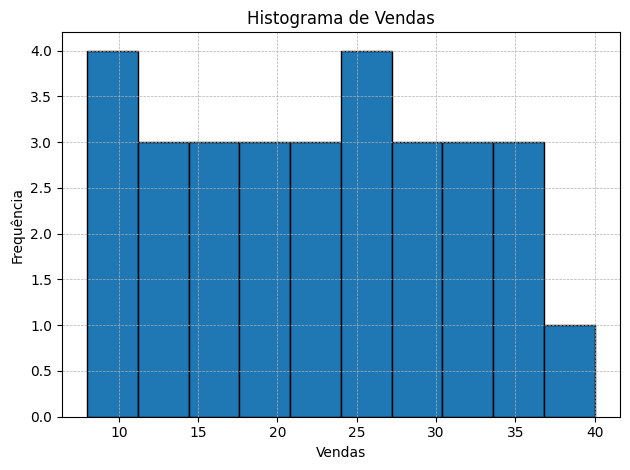

In [12]:
import matplotlib.pyplot as plt

plt.hist(vendas, edgecolor="black")
plt.xlabel("Vendas")
plt.ylabel("Frequência")
plt.title("Histograma de Vendas")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

##  Tipos de Variáveis

### Fundamentos Teóricos

As variáveis são valores que representam características de interesse em um conjunto de dados. Na Estatística Descritiva, as variáveis podem ser classificadas em duas categorias: qualitativas e quantitativas.

- Variáveis qualitativas: são variáveis que não apresentam valores mensuráveis. Podem ser divididas em duas subcategorias:
  - Qualitativa nominal: não há uma ordenação ou hierarquia entre as categorias. Exemplo: sexo, país, estado civil.
  - Qualitativa ordinal: há uma ordenação ou hierarquia entre as categorias. Exemplo: escolaridade, faixa salarial.

- Variáveis quantitativas: são variáveis que apresentam valores mensuráveis. Também podem ser divididas em duas subcategorias:
  - Quantitativa discreta: representam quantidades enumeráveis, ou seja, que podem ser contadas. Exemplo: quantidade de filhos, número de carros que trafegam por dia em uma rua.
  - Quantitativa contínua: apresentam valores contínuos dentro da escala real, podendo incluir valores fracionários ou decimais. Exemplo: salário, altura.

### Exemplo em Python com resposta

Vamos utilizar um exemplo para ilustrar a classificação das variáveis. Considere os dados abaixo, que representam informações sobre algumas características de cidades brasileiras:

```python
dados = {
    'Cidade': ['São Paulo', 'Curitiba', 'Brasília', 'Manaus', 'Fortaleza'],
    'População': [11253503, 1751907, 2570160, 1802014, 2452185],
    'Densidade Demográfica': [7398.26, 4027.04, 444.66, 158.06, 7786.44],
    'Ranking Pop. Residente': [1, 8, 4, 7, 5],
    'Região': ['Sudeste', 'Sul', 'Centro-Oeste', 'Norte', 'Nordeste']
}
```

Vamos classificar as variáveis presentes nesses dados:

- Cidade: qualitativa nominal
- População: quantitativa discreta
- Densidade Demográfica: quantitativa contínua
- Ranking Pop. Residente: qualitativa ordinal
- Região: qualitativa nominal

### Exercício Prático em Python com resposta

Agora, vamos realizar um exercício prático utilizando os dados das cidades brasileiras.

1. Calcule a média da população das cidades.

2. Encontre a cidade com a maior densidade demográfica.

### Exercício Discursivo com resposta

1. Explique a diferença entre variáveis qualitativas e quantitativas.

2. Dê exemplos de variáveis qualitativas nominal e ordinal.

3. Dê exemplos de variáveis quantitativas discreta e contínua.

In [21]:
dados = {
    'Cidade': ['São Paulo', 'Curitiba', 'Brasília', 'Manaus', 'Fortaleza'],
    'População': [11253503, 1751907, 2570160, 1802014, 2452185],
    'Densidade Demográfica': [7398.26, 4027.04, 444.66, 158.06, 7786.44],
    'Ranking Pop. Residente': [1, 8, 4, 7, 5],
    'Região': ['Sudeste', 'Sul', 'Centro-Oeste', 'Norte', 'Nordeste']
}

print(f"Calcule a média da população das cidades: {np.mean(dados['População'])}")

Calcule a média da população das cidades: 3965953.8


In [29]:
idx_max_den = dados['Densidade Demográfica'].index(max(dados['Densidade Demográfica']))

print(f"Encontre a cidade com a maior densidade demográfica: {dados['Cidade'][idx_max_den]}")

Encontre a cidade com a maior densidade demográfica: Fortaleza


## Métricas de Posição e Dispersão

### Fundamentos Teóricos

As métricas de posição e dispersão são medidas utilizadas na estatística descritiva para resumir e descrever a distribuição dos dados de forma quantitativa. Elas fornecem informações sobre a tendência central dos dados e a dispersão em torno dessa tendência.

#### Métricas de Posição

As métricas de posição são medidas que indicam a tendência central dos dados. As principais métricas de posição são:

1. Média Aritmética: é a média dos valores observados em uma amostra. É calculada somando todos os valores e dividindo pelo número de elementos na amostra.

2. Mediana: é o valor que separa os dados ordenados em duas partes iguais. Se o número de elementos na amostra for ímpar, a mediana é o valor do meio. Se o número de elementos for par, a mediana é a média dos dois valores do meio.

3. Moda: é o valor que ocorre com maior frequência em um conjunto de dados. Pode haver casos em que não exista moda (todos os valores são distintos) ou casos em que existam múltiplas modas (dois ou mais valores ocorrem com a mesma frequência máxima).

4. Quartis: são valores que dividem os dados ordenados em quatro partes iguais. O primeiro quartil (Q1) separa os 25% menores valores, o segundo quartil (Q2) é a mediana e o terceiro quartil (Q3) separa os 25% maiores valores.

#### Métricas de Dispersão

As métricas de dispersão indicam o grau de variabilidade dos dados em relação à tendência central. As principais métricas de dispersão são:

1. Amplitude: é a diferença entre o maior e o menor valor observado.

2. Variância: é a média dos quadrados das diferenças entre cada valor observado e a média aritmética. Ela mede o quão dispersos os valores estão em relação à média.

3. Desvio Padrão: é a raiz quadrada da variância. Ele indica a dispersão média dos valores em relação à média aritmética.

4. Coeficiente de Variação: é o desvio padrão dividido pela média aritmética, multiplicado por 100. Ele indica a variabilidade relativa dos dados em relação à média.

### Exemplo em Python com resposta

```python
# Exemplo de cálculo da média aritmética

def calcular_media(valores):
    soma = sum(valores)
    media = soma / len(valores)
    return media

dados = [10, 15, 20, 25, 30]
media = calcular_media(dados)
print("A média aritmética dos dados é:", media)
```

Resposta: A média aritmética dos dados é: 20

### Exercício Prático em Python com resposta

1. Calcular a mediana de um conjunto de dados

### Exercício Discursivo com resposta

Suponha que você esteja analisando os salários de uma empresa e possui os seguintes dados:

Salários: [2000, 2500, 3000, 3500, 4000]

1. Calcule a média aritmética dos salários.
2. Calcule a mediana dos salários.
3. Calcule a amplitude dos salários.
4. Calcule a variância dos salários.
5. Calcule o desvio padrão dos salários.
6. Calcule o coeficiente de variação dos salários.

In [41]:
def mediana(valores):
  valores.sort()
  n=len(valores)

  if n%2==0:
    mediana = (valores[n//2 + 1] + valores[n//2 - 1])/2
  else:
    mediana = valores[n//2]

  return mediana

lista = [10,1,58,2,7,87]
print(mediana(lista))

32.5


## Métricas de Dispersão

Nesta aula, vamos aprender sobre as métricas de dispersão, que são medidas de variabilidade utilizadas na estatística descritiva. Essas métricas nos ajudam a entender o quão afastadas as observações de um conjunto de dados estão em relação a uma medida de centralidade, como a média ou a mediana.

### Fundamentos Teóricos

#### Amplitude

A amplitude é a diferença entre o valor máximo e mínimo de uma amostra de dados. Ela indica o tamanho da sequência de valores possíveis que a amostra pode assumir. A fórmula para calcular a amplitude é:

A = max(X) - min(X)

É importante ressaltar que a amplitude é muito sensível a valores discrepantes, também conhecidos como outliers.

#### Variância

A variância mede o quão distantes os dados estão em relação à média das observações. Ela é calculada pela fórmula:

Var(X) = Σ(x_i - ẋ)^2 / (n-1)

Quanto mais próximas as observações estão da média, menor será o valor da variância. Por outro lado, quanto maior o valor da variância, mais afastadas as observações estão da média.

#### Desvio Padrão

O desvio padrão também mede o quão distantes os dados estão em relação à média. No entanto, ele corrige a unidade de medida da variância, que é quadrática. O desvio padrão é calculado aplicando a raiz quadrada da variância:

σ = √Var(X)

### Exemplo em Python

Vamos utilizar um exemplo para calcular a amplitude, variância e desvio padrão de um conjunto de dados. Suponha que temos as seguintes notas de um grupo de alunos em uma prova:

notas = [7, 8, 6, 9, 7, 5, 8, 7]

Para calcular a amplitude, basta subtrair o valor mínimo do valor máximo:

amplitude = max(notas) - min(notas)
print("Amplitude:", amplitude)

Para calcular a variância, podemos utilizar a biblioteca numpy:

import numpy as np

variancia = np.var(notas, ddof=1)
print("Variância:", variancia)

Para calcular o desvio padrão, basta aplicar a raiz quadrada da variância:

desvio_padrao = np.sqrt(variancia)
print("Desvio Padrão:", desvio_padrao)

### Exercício Prático

Agora é a sua vez! Utilize os conhecimentos adquiridos para resolver o seguinte exercício:

Suponha que você está analisando o tempo de resposta de um sistema de atendimento ao cliente. Você coletou os seguintes tempos de resposta em segundos: [10, 15, 12, 8, 20, 17, 13, 9, 11, 14]

1. Calcule a amplitude desses dados.
2. Calcule a variância e o desvio padrão.

Dica: Utilize a biblioteca numpy para facilitar os cálculos.

### Exercício Discursivo

Responda às seguintes perguntas:

1. O que a amplitude nos diz sobre os dados?
2. Como podemos interpretar o valor da variância?
3. Qual a vantagem de utilizar o desvio padrão em vez da variância?

##Associação entre Variáveis Quantitativas

### Fundamentos Teóricos

Nesta aula, vamos explorar a associação entre variáveis quantitativas. Vamos aprender sobre a covariância e a correlação, duas métricas que nos ajudam a entender a interação entre diferentes amostras.

#### Covariância

A covariância é uma medida que nos permite avaliar o quão distantes duas amostras aleatórias estão de suas respectivas médias. Ela é o caso geral da variância e nos ajuda a entender a relação entre duas variáveis quantitativas.

#### Correlação

A correlação é uma métrica utilizada para avaliar a dependência entre duas variáveis. Ela nos permite quantificar como diferentes variáveis interagem entre si. O valor da correlação varia entre -1 e 1, onde valores próximos aos extremos indicam uma forte correlação entre as variáveis, e valores próximos de zero indicam uma fraca dependência entre elas.

É importante ressaltar que a correlação não necessariamente é linear. Ela pode indicar tanto uma relação linear quanto uma relação não-linear entre as variáveis.

Existem diferentes métodos para calcular a correlação, sendo o mais comum o coeficiente de correlação de Pearson.

#### Coeficiente de Correlação de Pearson

O coeficiente de correlação de Pearson é uma medida que quantifica a relação linear entre duas variáveis numéricas. Quanto mais próximo de -1 ou 1, mais linearmente correlacionadas estão as variáveis analisadas. O cálculo para o coeficiente de correlação de Pearson é dado pela fórmula:

![Pearson's correlation coefficient](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/400px-Correlation_examples2.svg.png)

### Exemplo em Python

Vamos utilizar um exemplo para calcular a covariância e o coeficiente de correlação de Pearson entre duas variáveis: a quantidade de horas de estudo de um aluno e sua nota em uma prova.

```python
import numpy as np

# Dados de horas de estudo e notas dos alunos
horas_estudo = np.array([5, 10, 15, 20, 25])
notas = np.array([60, 70, 80, 90, 100])

# Cálculo da covariância
covariance = np.cov(horas_estudo, notas)[0, 1]
print("Covariância:", covariance)

# Cálculo do coeficiente de correlação de Pearson
correlation = np.corrcoef(horas_estudo, notas)[0, 1]
print("Correlação de Pearson:", correlation)
```

Output:
```
Covariância: 125.0
Correlação de Pearson: 1.0
```

Neste exemplo, a covariância entre as horas de estudo e as notas dos alunos é de 125.0. Já o coeficiente de correlação de Pearson é de 1.0, indicando uma forte correlação positiva entre as variáveis.

### Exercício Prático em Python

Vamos praticar o cálculo da covariância e do coeficiente de correlação de Pearson utilizando um conjunto de dados real. Utilizaremos um conjunto de dados que contém informações sobre o desempenho de alunos em uma escola.

### Exercício Discursivo

Pense em um cenário real em que a covariância e o coeficiente de correlação de Pearson seriam úteis para analisar a relação entre duas variáveis quantitativas. Explique o cenário e como essas métricas poderiam ajudar na análise dos dados.

## Boxplot e Outliers

### Fundamentos Teóricos

O Boxplot é uma representação gráfica utilizada para avaliar a distribuição de um conjunto de dados. Ele é composto por um retângulo (box) que representa os quartis Q1, Q2 (mediana) e Q3, e por duas hastes (whiskers) que representam os limites inferior e superior dos dados.

Os quartis são medidas estatísticas que dividem o conjunto de dados em quatro partes iguais. O primeiro quartil (Q1) é o valor que divide os 25% menores valores do conjunto, a mediana (Q2) divide os 50% menores e maiores valores, e o terceiro quartil (Q3) divide os 75% menores valores.

Os limites inferior e superior do Boxplot são calculados da seguinte forma:

Limite inferior = Q1 - 1,5 * IQR
Limite superior = Q3 + 1,5 * IQR

O IQR (Interquartile Range) é a diferença entre o terceiro e o primeiro quartil (IQR = Q3 - Q1). Valores que estão abaixo do limite inferior ou acima do limite superior são considerados outliers, ou seja, valores discrepantes em relação à distribuição dos dados.

Os outliers podem ser causados por erros experimentais, erros de medição ou mesmo por valores que fazem sentido dentro do contexto da distribuição. É importante identificar e entender a natureza desses valores para decidir se eles devem ser tratados ou não.

### Exemplo em Python com resposta

Vamos utilizar um exemplo para entender como construir um Boxplot e identificar outliers em um conjunto de dados. Suponha que temos uma lista de notas de alunos em uma disciplina:

```python
notas = [7.5, 8.2, 6.9, 9.8, 7.3, 8.7, 5.5, 9.1, 8.4, 7.8, 6.2, 9.5, 8.9, 7.1, 6.8, 9.3, 8.6, 7.7, 6.5, 9.7]
```

Para construir o Boxplot, podemos utilizar a biblioteca matplotlib:

```python
import matplotlib.pyplot as plt

plt.boxplot(notas)
plt.title("Boxplot - Notas dos Alunos")
plt.ylabel("Notas")
plt.show()
```

Podemos observar que o retângulo (box) representa os quartis Q1, Q2 (mediana) e Q3, e as hastes (whiskers) representam os limites inferior e superior dos dados. Além disso, temos um ponto acima do limite superior, que é considerado um outlier.

### Exercício Prático em Python com resposta

Agora, vamos realizar um exercício prático para identificar outliers em um conjunto de dados. Suponha que temos uma lista de salários de funcionários de uma empresa:

```python
salarios = [2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000]
```

Utilizando o conhecimento sobre Boxplot e outliers, escreva um código em Python para identificar se existem outliers nesse conjunto de dados.


### Exercício Discursivo com resposta

Suponha que você é um analista de dados de uma empresa de e-commerce e recebeu um conjunto de dados com as vendas diárias de um determinado produto nos últimos 30 dias. Você precisa identificar se existem outliers nesse conjunto de dados e explicar como você faria essa análise.

## Assimetria

### Fundamentos Teóricos

A assimetria é uma medida estatística que indica o grau de desvio ou afastamento da simetria de uma distribuição. Quando uma distribuição é simétrica, as métricas de posição como média, mediana e moda estão localizadas no mesmo ponto, indicando um perfeito equilíbrio na distribuição. No entanto, na maioria dos casos, essa distribuição equilibrada não ocorre e as métricas de posição recaem em pontos diferentes da distribuição, tornando-a assimétrica.

Existem dois tipos de assimetria:

1. Assimetria Negativa ou "à esquerda": Nesse caso, a média é menor que a mediana, que por sua vez é menor que a moda.
2. Assimetria Positiva ou "à direita": Nesse caso, a moda é menor que a mediana, que por sua vez é menor que a média.

A métrica utilizada para avaliar o grau de assimetria de uma distribuição é a distorção (skewness), que é calculada da seguinte forma:

s(X) = (1/σ^3) * Σ[(x_i - x̄)^3 / n]

Para identificar o tipo de assimetria a partir do valor da distorção, deve-se seguir a seguinte referência:

- s = 0: distribuição simétrica
- s > 0: assimetria à direita
- s < 0: assimetria à esquerda

### Exemplo em Python

```python
import numpy as np
from scipy.stats import skew

# Exemplo de uma distribuição assimétrica negativa
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Calculando a distorção
skewness = skew(data)

print("Distorção:", skewness)

if skewness > 0:
    print("Assimetria à direita")
elif skewness < 0:
    print("Assimetria à esquerda")
else:
    print("Distribuição simétrica")
```

**Resposta:**

Distorção: -0.2041241452319315
Assimetria à esquerda

### Exercício Prático em Python

Você é um analista de dados em uma empresa de e-commerce e recebeu um conjunto de dados contendo o valor das compras realizadas por clientes durante um mês. Seu objetivo é analisar a assimetria dessa distribuição de valores.

### Exercício Discursivo

Explique a importância de analisar a assimetria de uma distribuição em um contexto de análise de dados.

## Tabelas de Frequências

### Fundamentos Teóricos

A distribuição ou tabela de frequências é uma forma de organizar e resumir dados em classes ou categorias, contabilizando o número de ocorrências em cada uma delas. Esse tipo de tabela permite uma análise mais fácil e rápida dos dados, facilitando a identificação de padrões e tendências.

Existem três tipos de frequências que podem ser utilizadas em agrupamentos:

1. Frequência absoluta (ƒi): É o número de observações correspondente a cada classe. É comumente chamada apenas de frequência e representa a contagem de ocorrências em cada classe.

2. Frequência relativa (ƒri): É o quociente entre a frequência absoluta da classe correspondente e a soma das frequências de todas as classes. Essa medida expressa a proporção de ocorrências em relação ao total observado.

3. Frequência percentual (pi): É obtida multiplicando a frequência relativa por 100. Essa medida expressa a proporção de ocorrências em forma de porcentagem.

### Exemplo em Python com resposta

Vamos utilizar um exemplo para ilustrar como criar uma tabela de frequências em Python. Suponha que temos uma lista de notas de alunos em uma disciplina e queremos criar uma tabela de frequências para analisar a distribuição dessas notas.

```python
notas = [7, 8, 6, 7, 9, 8, 7, 6, 8, 9, 7, 6, 8, 9, 10, 7, 8, 6, 7, 9]

# Criando a tabela de frequências
frequencias = {}
total = len(notas)

for nota in notas:
    if nota in frequencias:
        frequencias[nota] += 1
    else:
        frequencias[nota] = 1

# Calculando as frequências relativas e percentuais
frequencias_relativas = {}
frequencias_percentuais = {}

for nota, frequencia in frequencias.items():
    frequencia_relativa = frequencia / total
    frequencia_percentual = frequencia_relativa * 100
    frequencias_relativas[nota] = frequencia_relativa
    frequencias_percentuais[nota] = frequencia_percentual

# Imprimindo a tabela de frequências
print("Nota\tFrequência\tFrequência Relativa\tFrequência Percentual")
for nota in sorted(frequencias.keys()):
    print(f"{nota}\t{frequencias[nota]}\t\t{frequencias_relativas[nota]:.3f}\t\t\t{frequencias_percentuais[nota]:.1f}%")
```

Resultado:

```
Nota    Frequência    Frequência Relativa    Frequência Percentual
6       4             0.200                   20.0%
7       6             0.300                   30.0%
8       5             0.250                   25.0%
9       4             0.200                   20.0%
10      1             0.050                   5.0%
```

Nesse exemplo, temos uma lista de notas de 20 alunos em uma disciplina. Utilizando o código em Python, criamos a tabela de frequências com as frequências absolutas, relativas e percentuais para cada nota. Podemos observar que a nota mais frequente é 7, com 6 ocorrências, e a nota menos frequente é 10, com apenas 1 ocorrência.

### Exercício Prático em Python com resposta

Agora, vamos realizar um exercício prático para criar uma tabela de frequências a partir de um conjunto de dados. Suponha que você é um analista de dados e recebeu um arquivo CSV com informações sobre a idade de pessoas em uma determinada cidade. Seu objetivo é criar uma tabela de frequências para analisar a distribuição das idades.

### Exercício Discursivo com resposta

Suponha que você é um analista de dados em uma empresa de e-commerce e recebeu um conjunto de dados contendo informações sobre as compras realizadas pelos clientes. Você precisa criar uma tabela de frequências para analisar a distribuição dos valores das compras.

1. Como você organizaria os dados para criar a tabela de frequências?

2. Quais seriam as frequências que você utilizaria nessa tabela?
   - Você pode utilizar a frequência absoluta, que representa o número de compras em cada faixa de valores. Além disso, você pode calcular a frequência relativa e a frequência percentual para expressar a proporção de compras em relação ao total observado.

3. Como você interpretaria os resultados da tabela de frequências?
   - A tabela de frequências permite analisar a distribuição dos valores das compras, identificando as faixas de valores mais comuns e menos comuns. Com base nessa análise, você pode tomar decisões estratégicas, como ajustar os preços dos produtos ou criar promoções para determinadas faixas de valores.

4. Quais outras análises você poderia realizar com base na tabela de frequências?
   - Além de analisar a distribuição dos valores das compras, você pode utilizar a tabela de frequências para identificar padrões de consumo, como quais faixas de valores são mais populares entre os clientes. Além disso, você pode comparar a distribuição dos valores das compras ao longo do tempo ou entre diferentes segmentos de clientes.

5. Como você poderia utilizar a tabela de frequências para tomar decisões estratégicas na empresa de e-commerce?
   - Com base na tabela de frequências, você pode identificar as faixas de valores mais populares e direcionar suas estratégias de marketing e vendas para essas faixas. Além disso, você pode identificar faixas de valores menos populares e criar promoções ou descontos para impulsionar as vendas nesses segmentos. A tabela de frequências também pode ajudar a identificar oportunidades de crescimento e segmentação de mercado.